In [92]:
import os
import sys
import argparse
import scipy.io
import numpy as np
import librosa
import matplotlib.pyplot as plt

resdir  = '/Users/schwarz/Documents/projects/ABC DJ/src-git/unmixing/results-unmixdb-full/'
mixbase = 'set275mix3-resample-compressor-22'

resname = resdir + mixbase + '.mat'
rmsname = resdir + mixbase + '-rms.mat'

res = scipy.io.loadmat(resname, simplify_cells=True)
rms = scipy.io.loadmat(rmsname, simplify_cells=True)
#print(res)

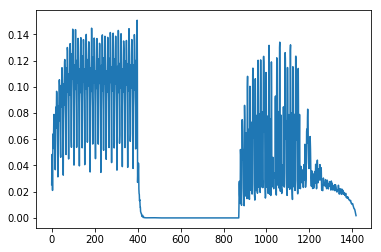

In [93]:
# check loudness of whole mix
plt.plot(rms['rms'])

5 start 0 len 30 duration 2.786394557823129
5 start 427 len 43 duration 3.9938321995464854
8 start 0 len 20 duration 1.8575963718820863
9 start 0 len 20 duration 1.8575963718820863
13 start 457 len 17 duration 1.5789569160997732
18 start 0 len 20 duration 1.8575963718820863
18 start 455 len 32 duration 2.972154195011338
19 start 0 len 20 duration 1.8575963718820863
19 start 456 len 31 duration 2.8792743764172335
22 start 487 len 34 duration 3.1579138321995464
25 start 0 len 11 duration 1.0216780045351475
25 start 645 len 13 duration 1.207437641723356
26 start 0 len 13 duration 1.207437641723356
27 start 0 len 15 duration 1.3931972789115645
31 start 0 len 23 duration 2.136235827664399
31 start 491 len 19 duration 1.7647165532879818
32 start 0 len 21 duration 1.9504761904761905
32 start 456 len 18 duration 1.6718367346938776
34 start 457 len 30 duration 2.786394557823129
36 start 0 len 20 duration 1.8575963718820863
36 start 420 len 54 duration 5.015510204081632


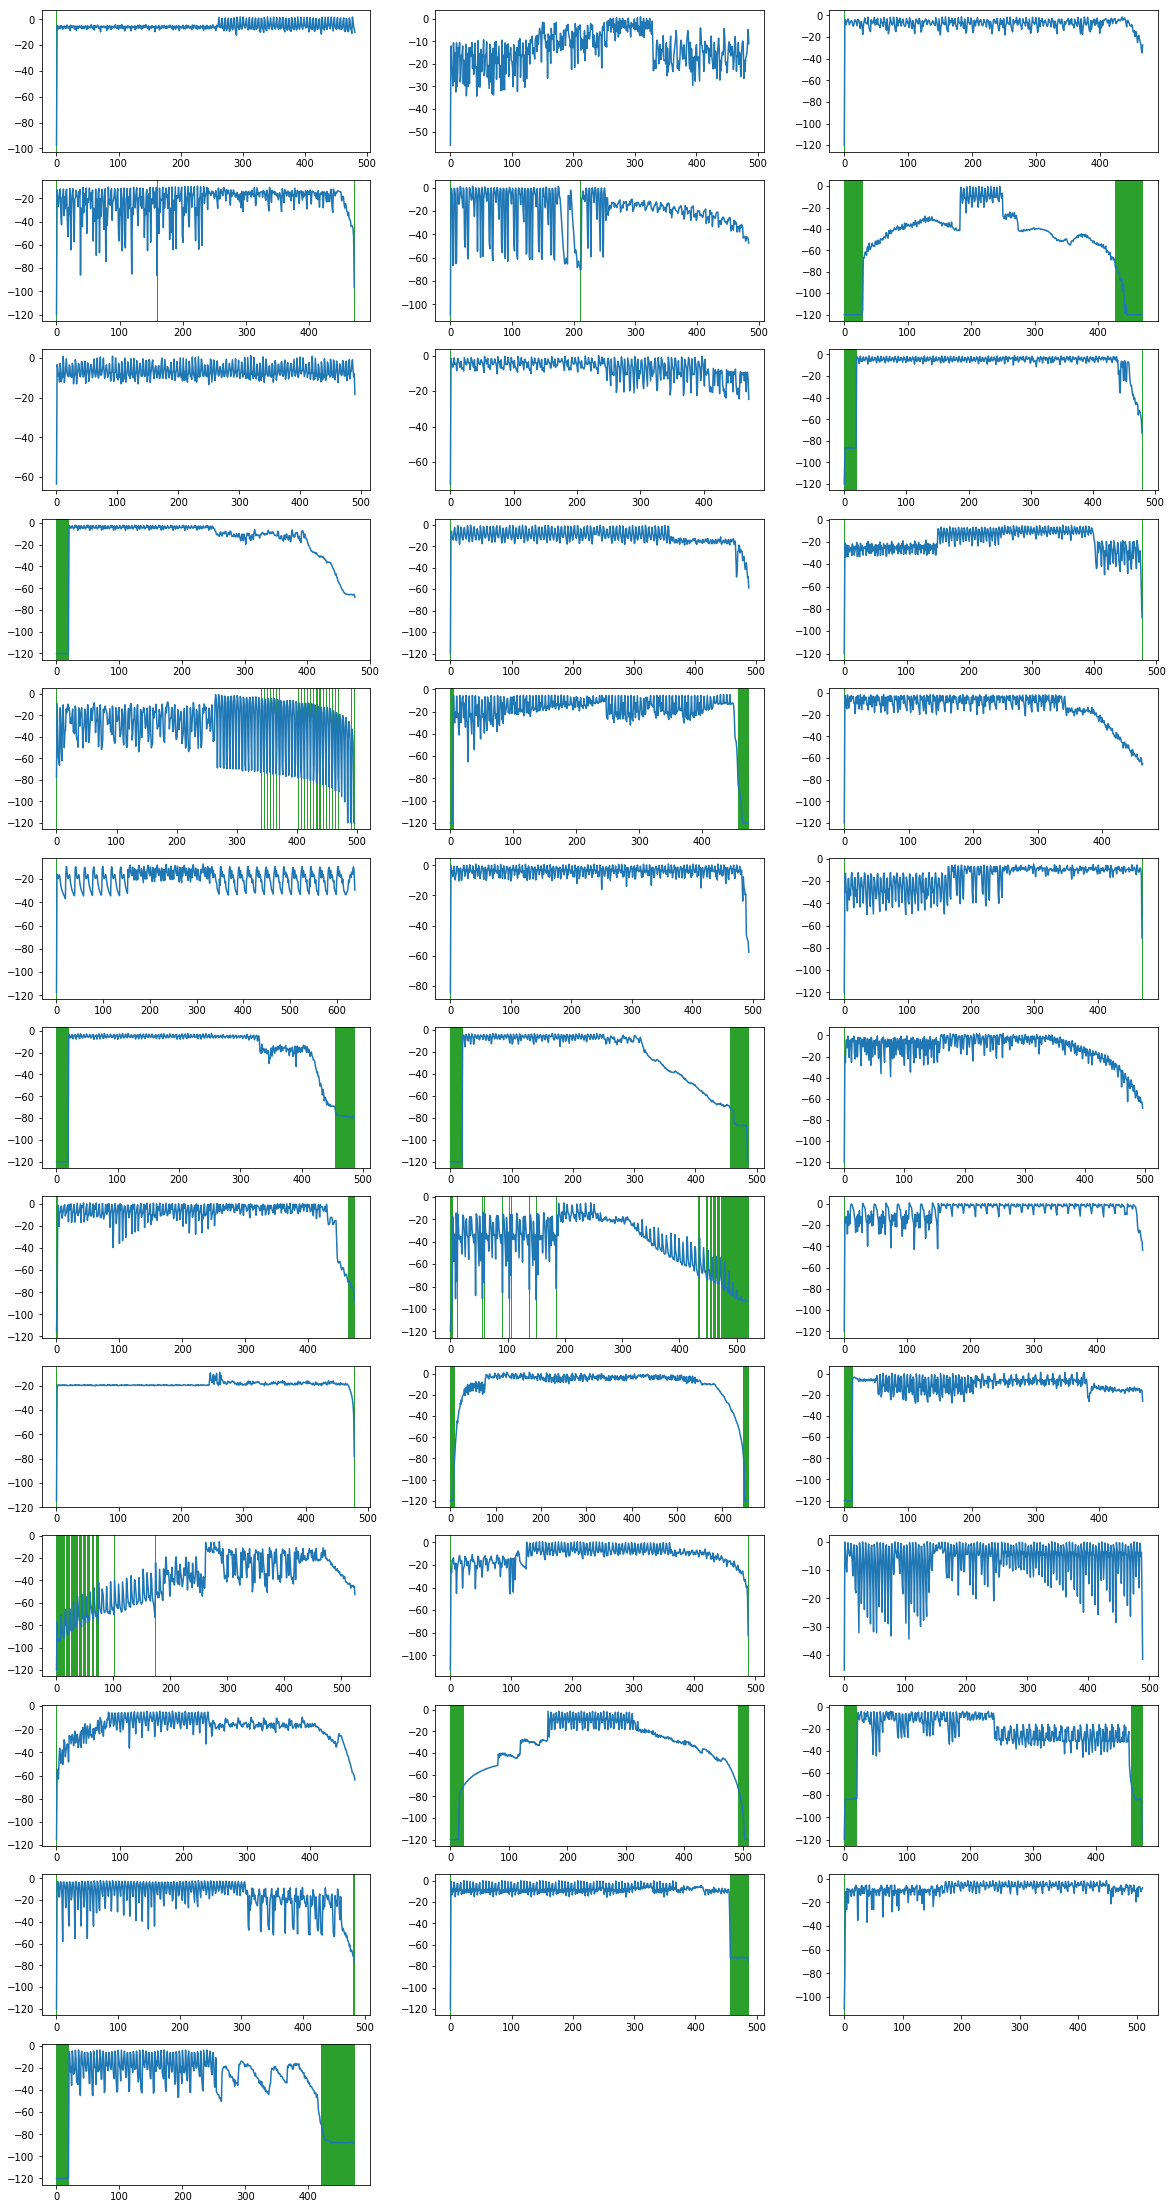

In [95]:
# check for long silent parts
import glob
import soundfile
import librosa
import numpy as np
import matplotlib.pyplot as plt

def find_runs (cond):
    _, i, c = np.unique(np.r_[[0], cond[:-1] != cond[1:]].cumsum(),
                    return_index = 1,                   
                    return_counts = 1)

    for index, count in zip(i, c):
        if cond[index]:
            yield index, count
        
refsongdir = '/Users/schwarz/Documents/projects/ABC DJ/data/unmixdb/excerpts/set123/refsongs/'
mp3list = glob.glob(refsongdir + '*.mp3')
winsize = 4096
hopsize = 4096

n = 3
m = np.ceil(len(mp3list) / 3)
#print(len(mp3list), m, n)
plt.figure(figsize=(20, 40))

for i, mp3name in enumerate(mp3list):
    #try:
        # broken:          y, sr = librosa.load(mp3name, sr=None)
        # slow: 
        y, sr = soundfile.read(mp3name)
        # broken install: y, sr = audiofile.read(mp3name)

        #print('OK ', i, mp3name, y.shape, sr)
        
        # to mono
        y = np.sum(y, axis=1)
        #print(y.shape)
        
        # Extract RMS, convert to dB (clip at -120dB)
        rms = np.squeeze(20 * np.log10(librosa.feature.rms(y=y, frame_length=winsize, hop_length=hopsize) + 1e-6))
        #print(rms.shape, min(rms), max(rms))
        plt.subplot(m, n, i + 1)
        plt.plot(np.squeeze(rms))
        
        # find chunks <-70dB
        for start, count in find_runs(rms < -70):
            dur = ((count - 1) * hopsize + winsize)/ sr
            if dur > 1:
                print(i, 'start', start, 'len', count, 'duration', dur)
            plt.axvspan(start, start + count, facecolor='#2ca02c')

        #plt.show()
    #except:
        #print('NOT', mp3name)


In [89]:
cond = rms < -70
ind = np.argwhere(cond)
dind = ind[1:] - ind[:-1]
arr = np.squeeze(dind)
#print(cond, ind, dind)
#print(arr)

_, i, c = np.unique(np.r_[[0], ~np.isclose(arr[:-1], arr[1:])].cumsum(), 
                    return_index = 1, 
                    return_counts = 1)
for index, count in zip(i, c):
    if count > 1:
        pass#print('start', index, 'len', count, 'duration', ((count - 1) * hopsize + winsize)/ sr)
        
        
cond = np.array([True,True,True,False,False,True,True,False,True])
print(cond)

_, i, c = np.unique(np.r_[[0], cond[:-1] != cond[1:]].cumsum(),
                    return_index = 1,                   
                    return_counts = 1)
for index, count in zip(i, c):
    if cond[index]:
        print(cond[index], 'start', index, 'len', count)
        

[ True  True  True False False  True  True False  True]
True start 0 len 3
True start 5 len 2
True start 8 len 1


(1940480,) /Users/schwarz/Documents/projects/ABC DJ/data/unmixdb/excerpts/set123/refsongs/04_Hiroshi_Oki_-_Unagui_-_Antiritmo011.excerpt40.mp3


Text(0.5, 1.0, '/Users/schwarz/Documents/projects/ABC DJ/data/unmixdb/excerpts/set123/refsongs/04_Hiroshi_Oki_-_Unagui_-_Antiritmo011.excerpt40.mp3')

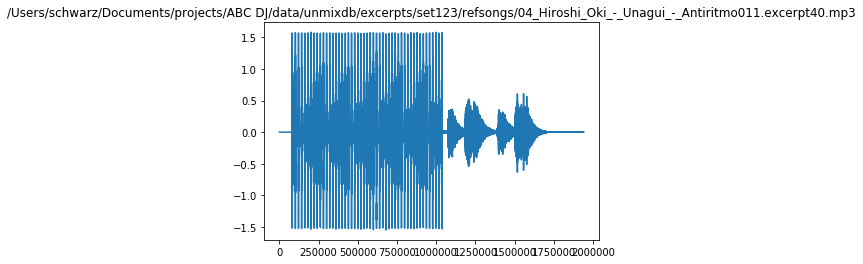

In [12]:
print(y.shape, mp3name)
plt.plot(y)
plt.title(mp3name)

164721757 22050


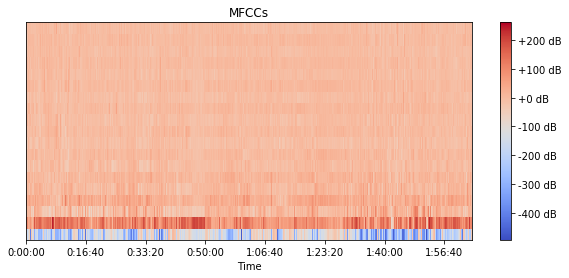

In [7]:
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_file = refsongdir + '01_Sascha_Muller_-_The_Book_Writer_-_Antiritmo002.excerpt40.mp3'
#audio_file = refsongdir + '02_Katsuyuki_Taguchi_-_Indigoblue_-_Antiritmo028.excerpt40.mp3'
audio_file = '/Users/schwarz/Music/radio/RL-2024-05-02-22-00.mp3'
y, sr = librosa.load(audio_file)
print(len(y), sr)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr)

# Display MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs')
plt.show()

In [66]:
rms < -70

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,